[View in Colaboratory](https://colab.research.google.com/github/andreinechaev/AccentCNN/blob/master/AccentReductionCNN.ipynb)

In [2]:
!mkdir data

Using `PyDrive` for getting a dataset from Google Drive.

In [22]:
!pip install -U -q PyDrive

In [25]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id': '15AkkjIg_AozxeA2r20I3HAFGF5Fso64l'})

In [55]:
downloaded.GetContentFile('data/set.zip')

In [74]:
import zipfile

zr = zipfile.ZipFile('data/set.zip', 'r')
zr.extractall('./data')
zr.close()

The given dataset contains mp3 files. Since mp3 is a proprietery format it's not well supported by open source tools. Here I'm converting all mp3 files into mono channel 16KHz `wav`. 
Second line is just a cleanup

In [0]:
!cd ./data/recordings; for i in *.mp3; do name=`echo $i | cut -d'.' -f1`; echo $name; ffmpeg -i "$i" -acodec pcm_s16le -ac 1 -ar 16000 "${name}.wav" 2>/dev/null; done; cd ../..;
!rm ./data/recordings/*.mp3

There are several approaches to work with audio in Machine Learning. For the sake of this experiment I'm planning to use Spectrogram analysis. Due to similarities with classical NN Image classification. 

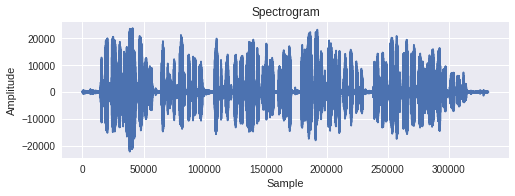

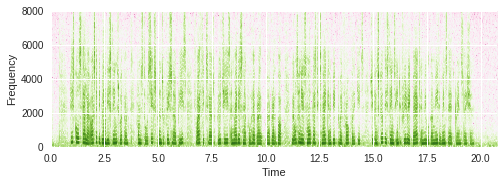

In [202]:
import matplotlib.pyplot as plt

from scipy.io import wavfile

# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read('data/recordings/afrikaans1.wav')

# Plot the signal read from wav file
plt.subplot(211)

plt.title('Spectrogram')

plt.plot(signalData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

fig1 = plt.figure(frameon=False) 
plt.subplot(212)
plt.specgram(signalData, Fs=samplingFrequency, cmap='PiYG')
plt.axis('off')
fig1.savefig('spec.png', bbox_inches="tight", pad_inches=0, transparent=True, cmap='PiYG')
plt.axis('on')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [203]:
import cv2

img = cv2.imread('spec.png')
height, width, ch = img.shape
print(f"Width: {width}; Height: {height}; Channels: {ch}")

Width: 475; Height: 156; Channels: 3


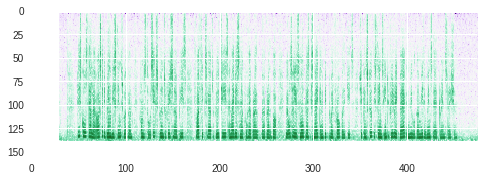

In [204]:
# cv2.normalize(img, img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(img, cmap='PiYG')